# Figuras com Domínios de modelagem

In [17]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
from mpl_toolkits.basemap import Basemap
import xarray as xr
import seaborn as sns

In [18]:
directory = str('E:/Mestrado/1.Resultados/Emissoes/')
metdir = str('E:/Mestrado/1.Resultados/Meteorologia/')
grade = ['d01_27km','d02_9km','d03_3km','d04_1km']
wrfmodel = 'pedruzzi2016_nudge'
emimodel = 'COMBO'
shapes = ['pirashape','RMSP']

## Abrir arquivos

In [19]:
wrffile = []
emifile = []
for g in grade:
    wrffile.append(Dataset(metdir+'arqWRF/jan/wrf_fnl_pira_'+wrfmodel+'_jan/wrfout_'+g[:3]+'_2015-01-09_00%3A00%3A00'))
    emifile.append(xr.open_dataset(directory+'jan.'+g+'/agts_l.edgar.20150109.9.'+g[:3]+'.htapv2.'+emimodel+'.ncf'))

## Buscar Latitudes e Longitudes

In [20]:
wrflats = []
wrflong = []
emilats = []
emilong = []
for g in range(0, len(grade)):
    wrflats.append(wrffile[g].variables['XLAT'][0,:,:])
    wrflong.append(wrffile[g].variables['XLONG'][0,:,:])
    croplat = int((wrffile[g].dimensions['south_north'].size-emifile[g].dims['ROW'])/2)
    croplon = int((wrffile[g].dimensions['south_north'].size-emifile[g].dims['ROW'])/2)
    emilats.append(wrffile[g].variables['XLAT'][0,croplat:-croplat,croplat:-croplat])  
    emilong.append(wrffile[g].variables['XLONG'][0,croplon:-croplon,croplon:-croplon])   

D:\Users\50033096\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
D:\Users\50033096\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
D:\Users\50033096\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


http://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/export?bbox=-53.28387451171875,-28.334312438964844,-42.03039550781251,-17.499649047851562&bboxSR=4326&imageSR=4326&size=400,385&dpi=500&format=png32&transparent=true&f=image


D:\Users\50033096\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:81: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
D:\Users\50033096\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:85: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


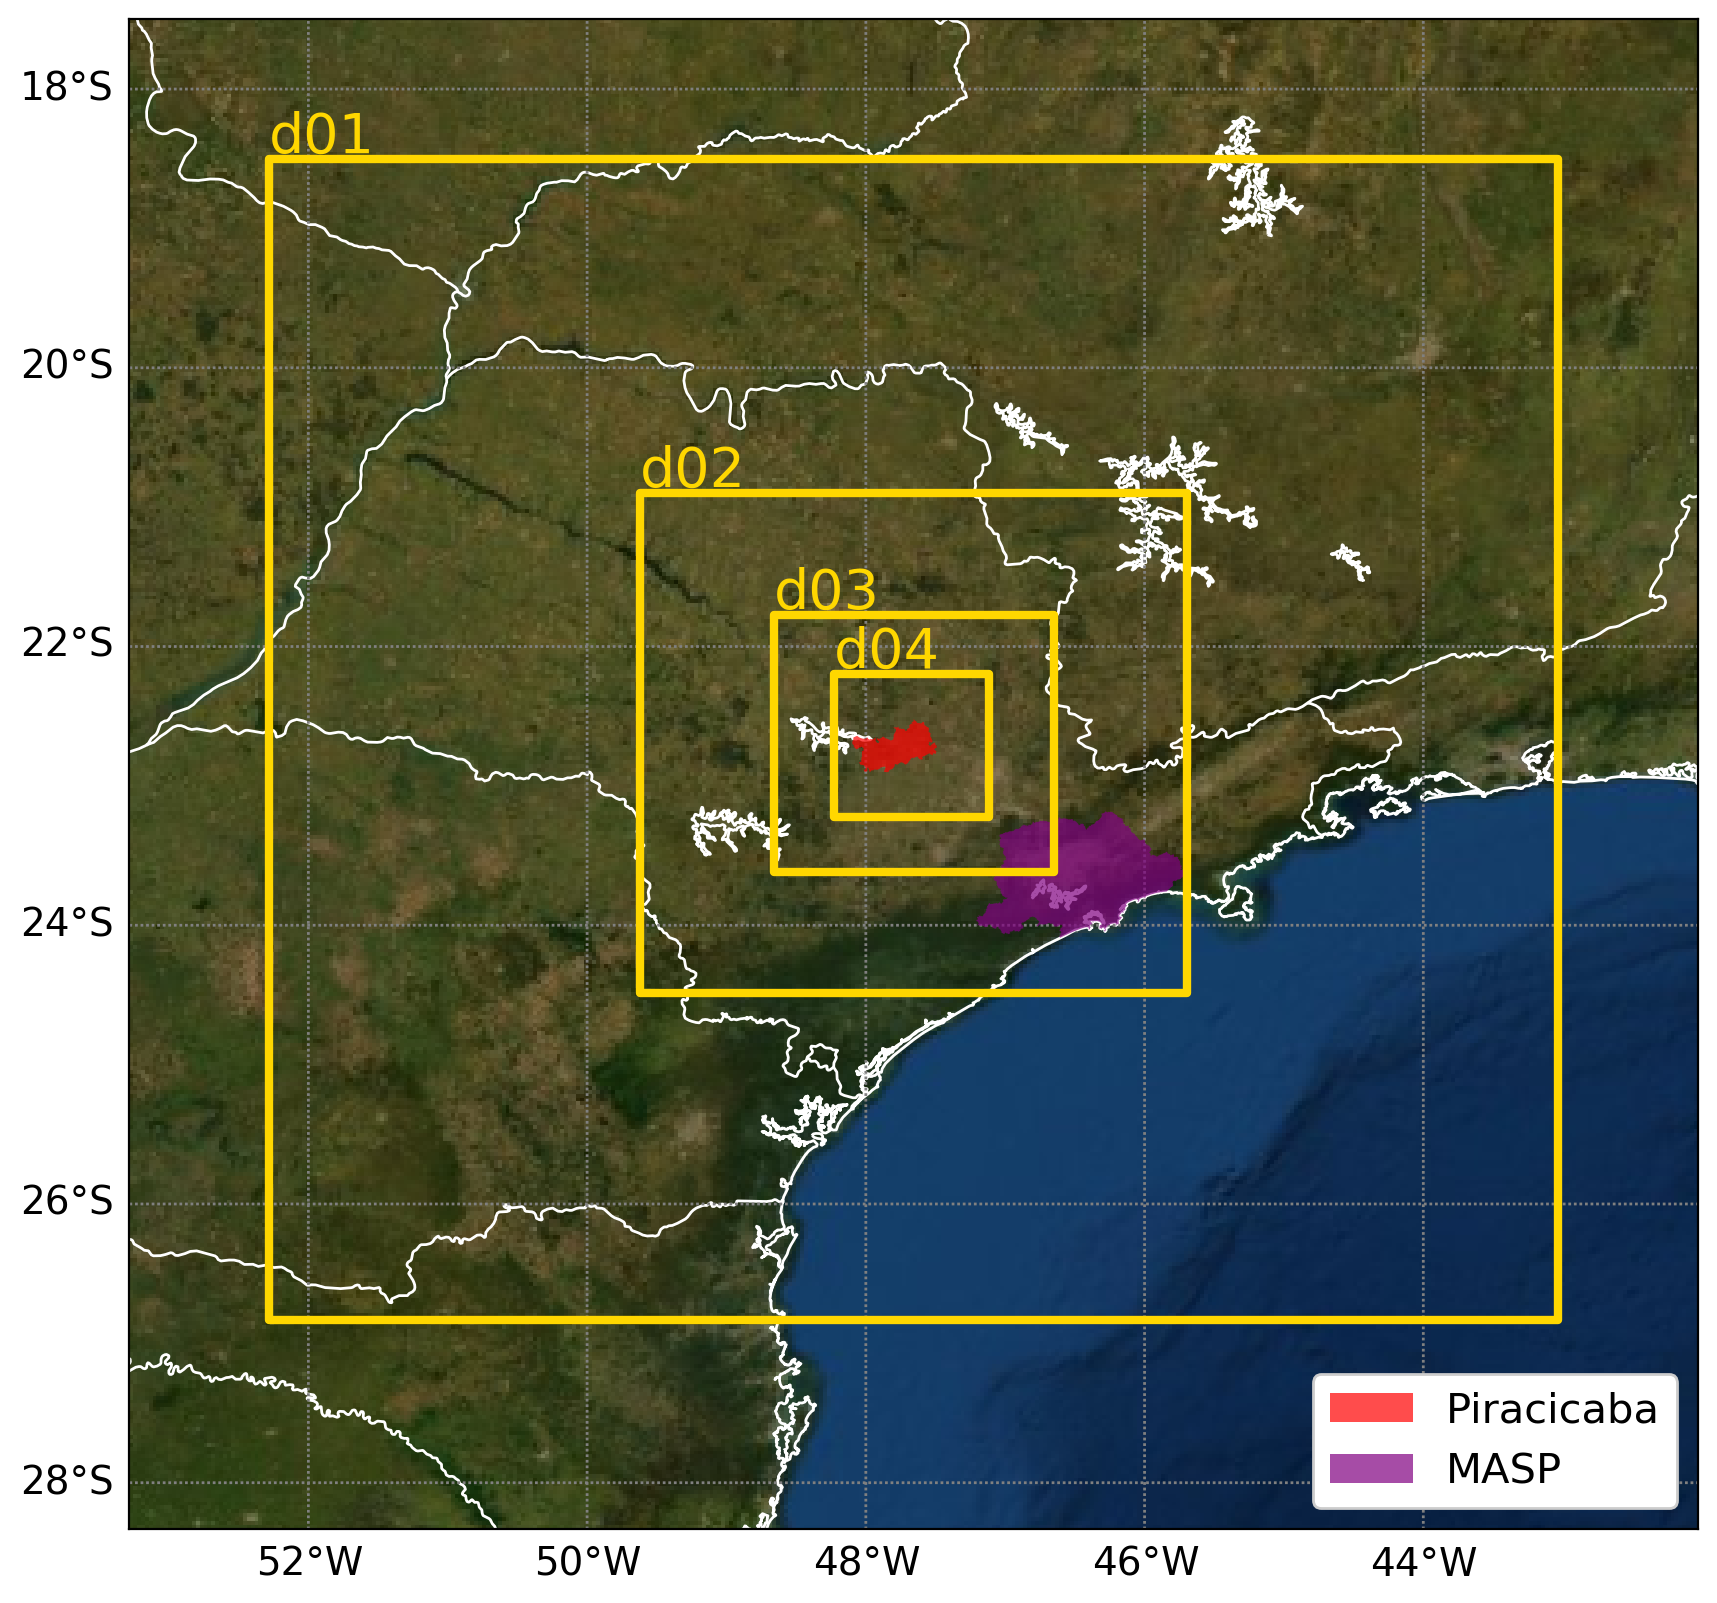

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,10), dpi=200)
b = 0

#box boundary 
bot_left_lat  = np.min(wrflats[b])-1.5
bot_left_lon  = np.min(wrflong[b])-1
top_right_lat = np.max(wrflats[b])+1
top_right_lon = np.max(wrflong[b])+1
center_lat    = np.mean(wrflats[b])
center_long   = np.mean(wrflong[b])

m = Basemap(epsg=4326, 
              llcrnrlon=bot_left_lon, 
              llcrnrlat=bot_left_lat,
              urcrnrlon=top_right_lon,
              urcrnrlat=top_right_lat,
              resolution='h',
              projection='lambert',
              ellps='WGS84',
              lat_0=center_lat,
              lon_0=center_long,
              ax = ax)

# ADD FEATURES
# Draw some map elements on the map
m.drawcoastlines(linewidth=1.0, color='w', zorder=1)
m.drawstates(linewidth=1.0, color='w', zorder=1)
m.drawcountries(linewidth=1.0, color='w', zorder=1)
#m.bluemarble()
#m.shadedrelief()
#m.drawrivers(color='blue')
m.drawparallels(np.arange(-80., 81., 2), color='grey', labels=[1,0,0,0], fontsize=14)       
m.drawmeridians(np.arange(-180., 181., 2), color='grey', labels=[0,0,0,1], fontsize=14)

# ADD BACKGROUND
maps = ['ESRI_Imagery_World_2D',    # 0
        'ESRI_StreetMap_World_2D',  # 1
        'NatGeo_World_Map',         # 2
        'NGS_Topo_US_2D',           # 3
        'Ocean_Basemap',            # 4
        'USA_Topo_Maps',            # 5
        'World_Imagery',            # 6
        'World_Physical_Map',       # 7
        'World_Shaded_Relief',      # 8
        'World_Street_Map',         # 9
        'World_Terrain_Base',       # 10
        'World_Topo_Map'            # 11
        ]
m.arcgisimage(service=maps[6], dpi=500, verbose= True)

# ADD RECTANGLES
#for i in range(0,len(wrffile)):
#    lons = np.linspace(np.min(wrflong[i]),np.max(wrflong[i]))
#    lats = np.linspace(np.min(wrflats[i]),np.max(wrflats[i]))
#    m.plot(lons, lats, color='gold', linewidth=2.0, latlon=True)

# ADD DOMINIOS
# Fill polygon shapes = domínios
patches = []
for i in range(0, len(wrffile)): 
    dom = np.array([[np.min(wrflong[i]),np.min(wrflats[i])],
                    [np.min(wrflong[i]),np.max(wrflats[i])],
                    [np.max(wrflong[i]),np.max(wrflats[i])],
                    [np.max(wrflong[i]),np.min(wrflats[i])]
                    ])
    patches.append(Polygon(dom))
ax.add_collection(PatchCollection(patches,facecolor=(0,1,1,0),
                                  edgecolor='gold',
                                  linewidths=3.0,
                                  zorder=5))
for i in range(0, len(wrffile)):
     ax.annotate(grade[i][:3], xy=(np.min(wrflong[i]),np.max(wrflats[i])),
                 xytext=(np.min(wrflong[i]),np.max(wrflats[i])+0.05),
                 color='gold', fontsize=20 , zorder=6) 

# ADD SHAPES
shps = ['Piracicaba', 'MASP']
colors= {'Piracicaba':'red', 'MASP':'purple'}
shapes = {}
#m.readshapefile(metdir+'arqShape/BRMUE250GC_SIR', 'Munícipios', color='grey', linewidth=0.5)
m.readshapefile(metdir+'arqShape/pirashape', 'Piracicaba', drawbounds = False, color='r', linewidth=1.0)
p = Polygon(np.array(m.Piracicaba)[0,:,:], True, facecolor=colors[shps[0]], edgecolor='none', alpha=0.7, zorder=2)
shapes[shps[0]] = p

m.readshapefile(metdir+'arqShape/RMSP_3', 'RMSP', drawbounds = False, color='r', linewidth=1.0)
p = Polygon(np.array(m.RMSP[13]), True, facecolor=colors[shps[1]], edgecolor='none', alpha=0.7, zorder=2)
shapes[shps[1]] = p

# shape names and legend
for shp in shps:
    plt.gca().add_artist(shapes[shp])        
# create legend, by first getting the already present handles, labels
handles, labels = plt.gca().get_legend_handles_labels()
# and then adding the new ones
handles.extend([shapes[shp] for shp in shps])  
labels.extend(shps)                     
plt.legend(handles=handles, labels=labels, framealpha=1., loc='lower right', fontsize=15)
plt.show()

              

D:\Users\50033096\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
D:\Users\50033096\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
D:\Users\50033096\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


http://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/export?bbox=-52.78387451171875,-27.834312438964844,-42.5303955078125,-17.999649047851562&bboxSR=4326&imageSR=4326&size=400,383&dpi=1000&format=png32&transparent=true&f=image


D:\Users\50033096\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:101: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
D:\Users\50033096\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:105: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


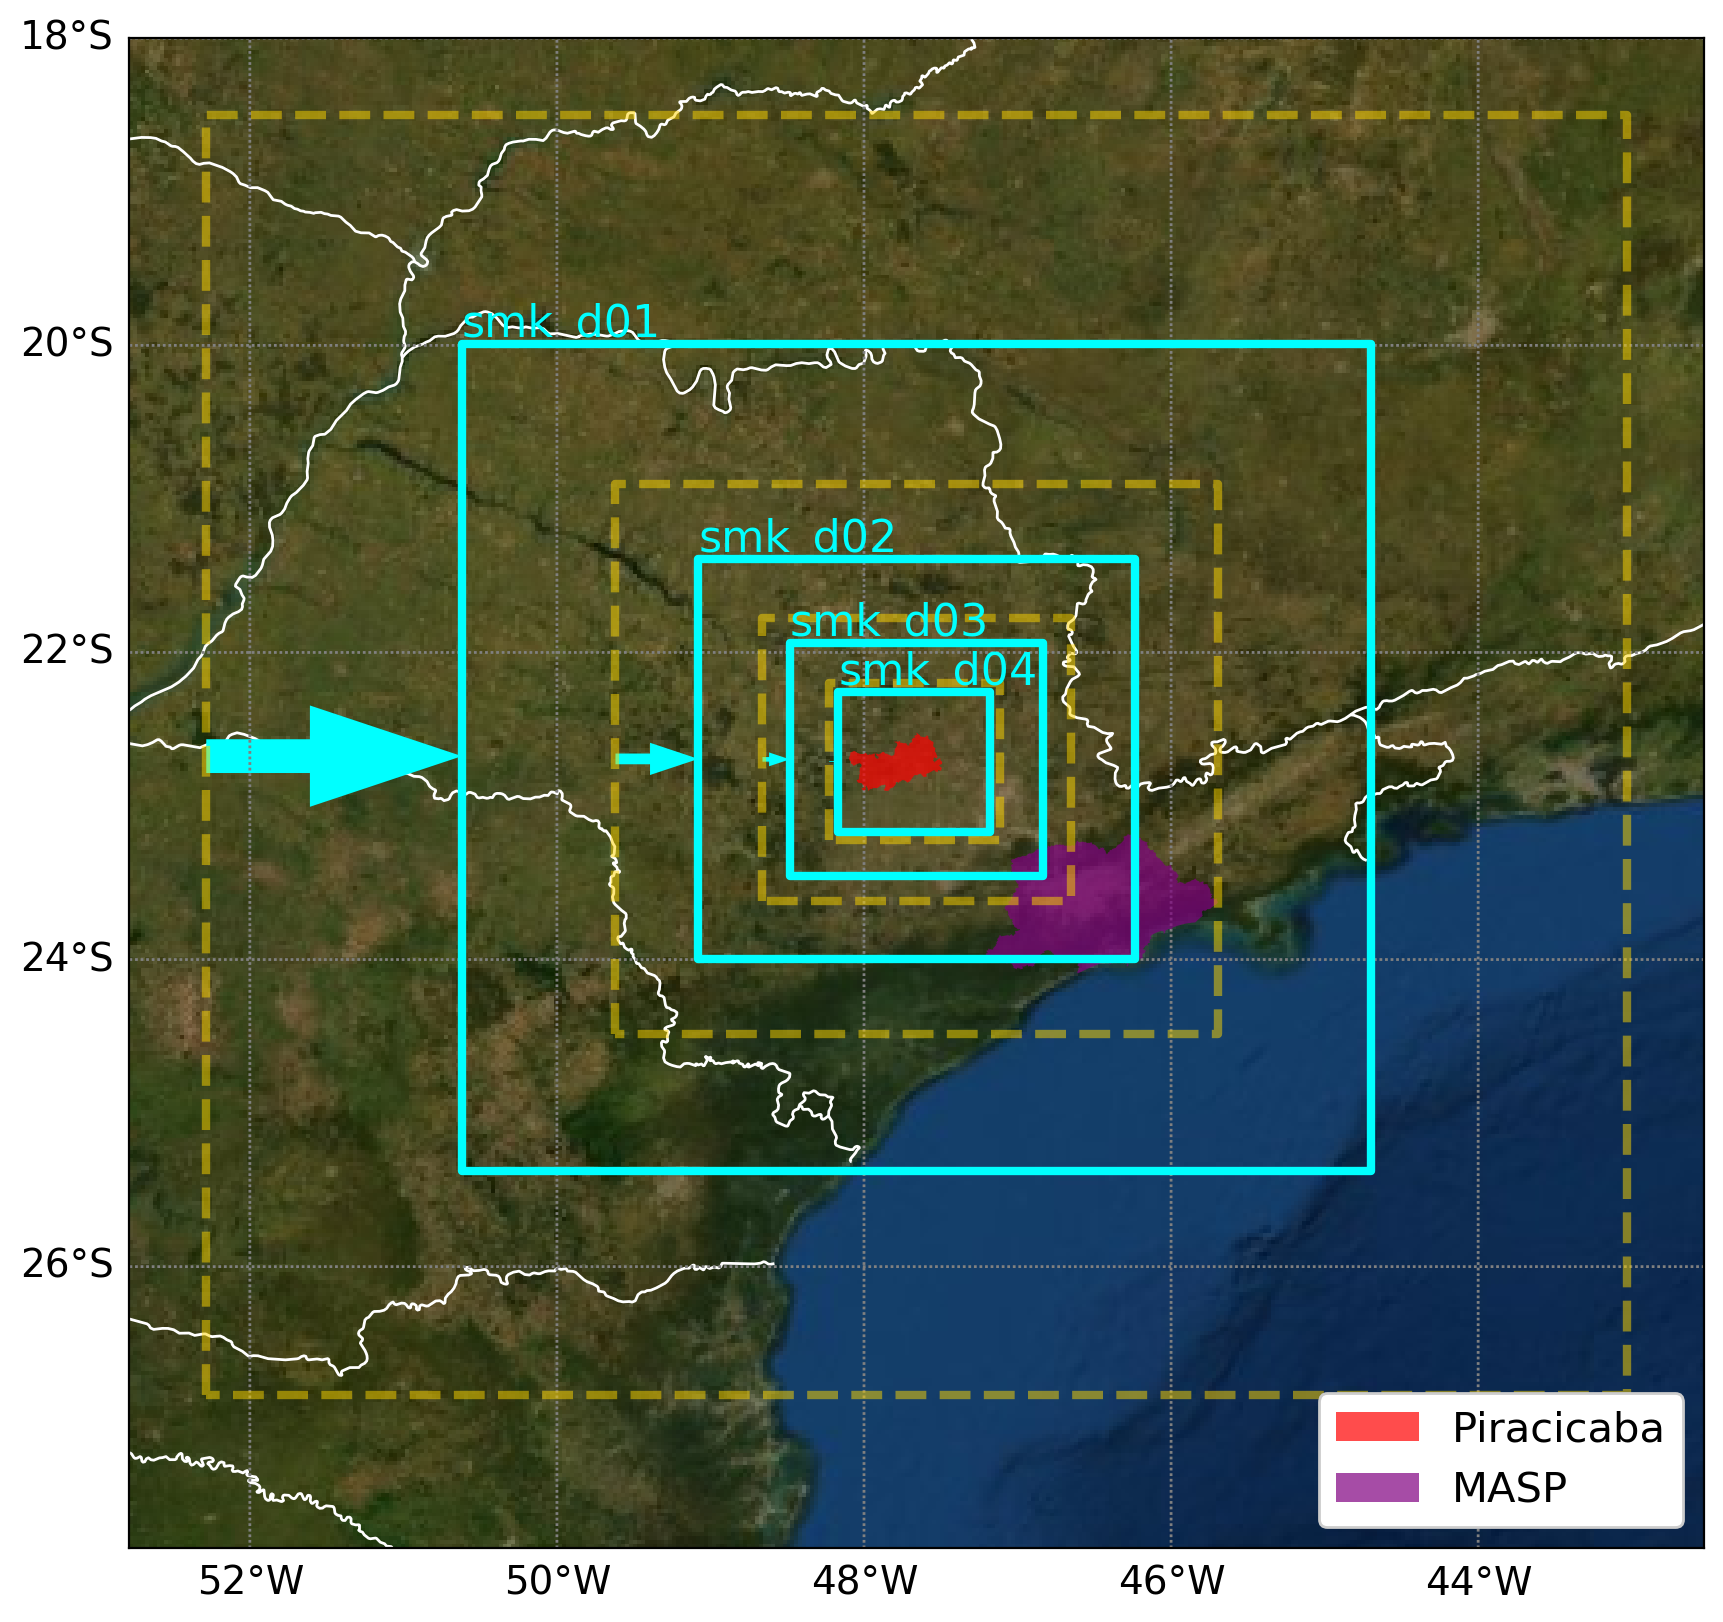

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,10), dpi=200)
b = 0

#box boundary 
bot_left_lat  = np.min(wrflats[b])-1
bot_left_lon  = np.min(wrflong[b])-0.5
top_right_lat = np.max(wrflats[b])+0.5
top_right_lon = np.max(wrflong[b])+0.5
center_lat    = np.mean(wrflats[b])
center_long   = np.mean(wrflong[b])

m = Basemap(epsg=4326, 
              llcrnrlon=bot_left_lon, 
              llcrnrlat=bot_left_lat,
              urcrnrlon=top_right_lon,
              urcrnrlat=top_right_lat,
              resolution='h',
              projection='lambert',
              ellps='WGS84',
              lat_0=center_lat,
              lon_0=center_long,
              ax = ax)

# ADD FEATURES
# Draw some map elements on the map
#m.drawcoastlines(linewidth=1.0, color='w', zorder=1)
m.drawstates(linewidth=1.0, color='w', zorder=1)
m.drawcountries(linewidth=1.0, color='w', zorder=1)
#m.bluemarble()
#m.shadedrelief()
#m.drawrivers(color='blue')
m.drawparallels(np.arange(-80., 81., 2), color='grey', labels=[1,0,0,0], fontsize=14)       
m.drawmeridians(np.arange(-180., 181., 2), color='grey', labels=[0,0,0,1], fontsize=14)

# ADD BACKGROUND
maps = ['ESRI_Imagery_World_2D',    # 0
        'ESRI_StreetMap_World_2D',  # 1
        'NatGeo_World_Map',         # 2
        'NGS_Topo_US_2D',           # 3
        'Ocean_Basemap',            # 4
        'USA_Topo_Maps',            # 5
        'World_Imagery',            # 6
        'World_Physical_Map',       # 7
        'World_Shaded_Relief',      # 8
        'World_Street_Map',         # 9
        'World_Terrain_Base',       # 10
        'World_Topo_Map'            # 11
        ]
m.arcgisimage(service=maps[6], dpi=1000, verbose= True)

# ADD RECTANGLES
#for i in range(0,len(wrffile)):
#    lons = np.linspace(np.min(wrflong[i]),np.max(wrflong[i]))
#    lats = np.linspace(np.min(wrflats[i]),np.max(wrflats[i]))
#    m.plot(lons, lats, color='gold', linewidth=2.0, latlon=True)

# ADD DOMINIOS - WRF
# Fill polygon shapes = domínios
patches = []
for i in range(0, len(wrffile)): 
    dom = np.array([[np.min(wrflong[i]),np.min(wrflats[i])],
                    [np.min(wrflong[i]),np.max(wrflats[i])],
                    [np.max(wrflong[i]),np.max(wrflats[i])],
                    [np.max(wrflong[i]),np.min(wrflats[i])]
                    ])
    patches.append(Polygon(dom))
ax.add_collection(PatchCollection(patches,facecolor=(0,1,1,0),
                                  edgecolor=(1.0,0.8431372549019608,0.0,0.5),
                                  linewidth=3.0,
                                  linestyle='--',
                                  zorder=5))

# ADD DOMINIOS - SMOKE
# Fill polygon shapes = domínios
patches = []
for i in range(0, len(wrffile)): 
    dom = np.array([[np.min(emilong[i]),np.min(emilats[i])],
                    [np.min(emilong[i]),np.max(emilats[i])],
                    [np.max(emilong[i]),np.max(emilats[i])],
                    [np.max(emilong[i]),np.min(emilats[i])]
                    ])
    patches.append(Polygon(dom))
ax.add_collection(PatchCollection(patches,facecolor=(0,1,1,0),
                                  edgecolor='cyan',
                                  linewidth=3.0,
                                  zorder=5))


for i in range(0, len(emifile)):
     ax.annotate('smk_'+grade[i][:3], 
                 xy=(np.min(emilong[i]),np.max(emilats[i])),
                 xytext=(np.min(emilong[i]),np.max(emilats[i])+0.05),
                 color='cyan', fontsize=16 , zorder=6) 

# ADD SHAPES

shps = ['Piracicaba', 'MASP']
colors= {'Piracicaba':'red', 'MASP':'purple'}
shapes = {}
#m.readshapefile(metdir+'arqShape/BRMUE250GC_SIR', 'Munícipios', color='grey', linewidth=0.5)
m.readshapefile(metdir+'arqShape/pirashape', 'Piracicaba', drawbounds = False, color='r', linewidth=1.0)
p = Polygon(np.array(m.Piracicaba)[0,:,:], True, facecolor=colors[shps[0]], edgecolor='none', alpha=0.7, zorder=2)
shapes[shps[0]] = p

m.readshapefile(metdir+'arqShape/RMSP_3', 'RMSP', drawbounds = False, color='r', linewidth=1.0)
p = Polygon(np.array(m.RMSP[13]), True, facecolor=colors[shps[1]], edgecolor='none', alpha=0.7, zorder=2)
shapes[shps[1]] = p

# shape names and legend
for shp in shps:
    plt.gca().add_artist(shapes[shp])        

# create legend, by first getting the already present handles, labels
handles, labels = plt.gca().get_legend_handles_labels()

# and then adding the new ones
handles.extend([shapes[shp] for shp in shps])  
labels.extend(shps)                     
plt.legend(handles=handles, labels=labels, framealpha=1., loc='lower right', fontsize=15)

# ADD ARROW
wid = [0.22, 0.07, 0.03, 0.005]
for i in range(0, len(wrffile)):
    ax.arrow(np.min(wrflong[i]),np.mean(wrflats[i]),
             np.min(emilong[i])-np.min(wrflong[i]), 
             0,
             width=wid[i],
             length_includes_head=True,
             facecolor='cyan',
             edgecolor='none')

plt.show()


In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,10), dpi=200)
b = 3

#box boundary 
bot_left_lat  = np.min(wrflats[b])-0.3
bot_left_lon  = np.min(wrflong[b])-0.2
top_right_lat = np.max(wrflats[b])+0.2
top_right_lon = np.max(wrflong[b])+0.2
center_lat    = np.mean(wrflats[b])
center_long   = np.mean(wrflong[b])

m = Basemap(epsg=4326, 
              llcrnrlon=bot_left_lon, 
              llcrnrlat=bot_left_lat,
              urcrnrlon=top_right_lon,
              urcrnrlat=top_right_lat,
              resolution='h',
              projection='lambert',
              ellps='WGS84',
              lat_0=center_lat,
              lon_0=center_long,
              ax = ax)

# ADD FEATURES
# Draw some map elements on the map
#m.drawcoastlines(linewidth=1.0, color='w', zorder=1)
m.drawstates(linewidth=1.0, color='w', zorder=1)
m.drawcountries(linewidth=1.0, color='w', zorder=1)
m.bluemarble()
#m.shadedrelief()
m.drawrivers(color='dodgerblue')
m.drawparallels(np.arange(-80., 81., 0.2), color='beige', labels=[1,0,0,0], fontsize=14)       
m.drawmeridians(np.arange(-180., 181., 0.2), color='beige', labels=[0,0,0,1], fontsize=14)

# ADD BACKGROUND
maps = ['ESRI_Imagery_World_2D',    # 0
        'ESRI_StreetMap_World_2D',  # 1
        'NatGeo_World_Map',         # 2
        'NGS_Topo_US_2D',           # 3
        'Ocean_Basemap',            # 4
        'USA_Topo_Maps',            # 5
        'World_Imagery',            # 6
        'World_Physical_Map',       # 7
        'World_Shaded_Relief',      # 8
        'World_Street_Map',         # 9
        'World_Terrain_Base',       # 10
        'World_Topo_Map'            # 11
        ]
m.arcgisimage(service=maps[6], dpi=1000, verbose= True)

# ADD RECTANGLES
#for i in range(0,len(wrffile)):
#    lons = np.linspace(np.min(wrflong[i]),np.max(wrflong[i]))
#    lats = np.linspace(np.min(wrflats[i]),np.max(wrflats[i]))
#    m.plot(lons, lats, color='gold', linewidth=2.0, latlon=True)

# ADD DOMINIOS
# Fill polygon shapes = domínios
patches = []
for i in range(0, len(wrffile)): 
    dom = np.array([[np.min(wrflong[i]),np.min(wrflats[i])],
                    [np.min(wrflong[i]),np.max(wrflats[i])],
                    [np.max(wrflong[i]),np.max(wrflats[i])],
                    [np.max(wrflong[i]),np.min(wrflats[i])]
                    ])
    patches.append(Polygon(dom))
ax.add_collection(PatchCollection(patches,facecolor=(0,1,1,0),
                                  edgecolor='gold',
                                  linewidths=3.0,
                                  zorder=5))
for i in range(0, len(wrffile)):
     ax.annotate(grade[i][:3], xy=(np.min(wrflong[i]),np.max(wrflats[i])),
                 xytext=(np.min(wrflong[i]),np.max(wrflats[i])+0.02),
                 color='gold', fontsize=20, weight='bold', zorder=6) 

# ADD SHAPES
shps = ['Piracicaba']
colors= {'Piracicaba':'red'}
shapes = {}
m.readshapefile(metdir+'arqShape/BRMUE250GC_SIR', 'Municipios', color='w', linewidth=1.0)

m.readshapefile(metdir+'arqShape/pirashape', 'Piracicaba', drawbounds = False, color='r', linewidth=1.0)
p = Polygon(np.array(m.Piracicaba)[0,:,:], True, facecolor=colors[shps[0]], edgecolor='none', alpha=0.5, zorder=2)
shapes[shps[0]] = p

mun = ['RIO CLARO','CAMPINAS','LIMEIRA','SOROCABA','DOIS CÓRREGOS',
       'MOGI','ITU','DOIS CÓRREGOS','ANGATUBA',
       'INDAIATUBA','ARARAS','LEME','PORTO FELIZ','PORANGABA', 
       'BOITUVA','IRACEMAPÓLIS','SUMARÉ','SALTO', 'ANALÂNDIA',
       'PIRACICABA','AMERICANA','PAULÍNIA',  
       'TATUÍ','RIO DAS PEDRAS','BOFETE',
       'CONCHAS','GUAREÍ','BROTAS','TATUÍ',
       'SANTA BÁRBARA','CAPIVARI','ITIRAPINA',
       'ANHEMBI','TIETÊ','PEREIRAS',
       'ITUPEVA','COSMOPÓLIS','DOURADO'
      ] #'HORTOLÂNDIA','NOVA ODESSA','SALTINHO','SÃO PEDRO''ELIAS FAUSTO','TORRINHA','MONTE MOR',

bbox_args=dict(pad=0.2,boxstyle="round", fc='aliceblue', ec="none", alpha=0.8)
arrow_args=dict(arrowstyle='wedge,tail_width=0.8',relpos=(0.2, 0.5),
                fc='aliceblue', ec="none", alpha=0.8)
                
for shp, info in zip(m.Municipios, m.Municipios_info):
    if info['NM_MUNICIP'] in mun:
        ax.annotate(info['NM_MUNICIP'],
                    xy=(np.mean((np.array(shp))[:,0]),
                    np.mean((np.array(shp))[:,1])),
                    xycoords='data',
                    xytext=(35,0), 
                    textcoords='offset pixels',
                    fontsize=12, color='k',
                    bbox=bbox_args,
                    arrowprops=arrow_args,
                    zorder=10)

#m.readshapefile(metdir+'arqShape/RMSP_3', 'RMSP', drawbounds = False, color='r', linewidth=1.0)
#p = Polygon(np.array(m.RMSP[13]), True, facecolor=colors[shps[1]], edgecolor='none', alpha=0.7, zorder=2)
#shapes[shps[1]] = p

# shape names and legend
for shp in shps:
    plt.gca().add_artist(shapes[shp])        
## create legend, by first getting the already present handles, labels
#handles, labels = plt.gca().get_legend_handles_labels()
## and then adding the new ones
#handles.extend([shapes[shp] for shp in shps])  
#labels.extend(shps)                     
#plt.legend(handles=handles, labels=labels, framealpha=1., loc='lower right', fontsize=15)

plt.show()

D:\Users\50033096\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
D:\Users\50033096\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
D:\Users\50033096\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
D:\Users\50033096\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


http://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/export?bbox=-48.4264404296875,-23.520504760742188,-46.91727905273437,-22.00012664794922&bboxSR=4326&imageSR=4326&size=400,402&dpi=1000&format=png32&transparent=true&f=image


D:\Users\50033096\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:80: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
D:\Users\50033096\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:82: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
